# Lake Model Solutions

## Exercise 1

We begin by importing the necessary packages.

In [1]:
using Plots
pyplot()
include("lake_model.jl")

simulate_rate_path (generic function with 1 method)

Construct a `LakeModel` object with the default parameter values and find its steady state.

In [2]:
lm = LakeModel()
x0 = rate_steady_state(lm)
println("Initial Steady State: $x0")

Initial Steady State: [0.9173319356025904,0.08266806439740906]


Initialize the simulation values.

In [3]:
N0 = 100
T = 50

50

New legislation changes $\lambda$ to 0.2.

In [4]:
lm_new = LakeModel(;lambda=0.2)

LakeModel(0.2,0.013,0.0124,0.00822,0.00418,2x2 Array{Float64,2}:
 0.978887   0.198356
 0.0252931  0.805824,2x2 Array{Float64,2}:
 0.974812   0.19753
 0.0251879  0.80247)

In [5]:
xbar = rate_steady_state(lm_new)
X_path = simulate_stock_path(lm_new, x0 * N0, T)
x_path = simulate_rate_path(lm_new, x0, T)
println("New Steady State: $xbar")

New Steady State: [0.8869042696880399,0.11309573031195891]


Plot the stocks.

[Plots.jl] Initializing backend: pyplot


2016-08-05 17:54:41.063 julia[8131:507] setCanCycle: is deprecated.  Please use setCollectionBehavior instead



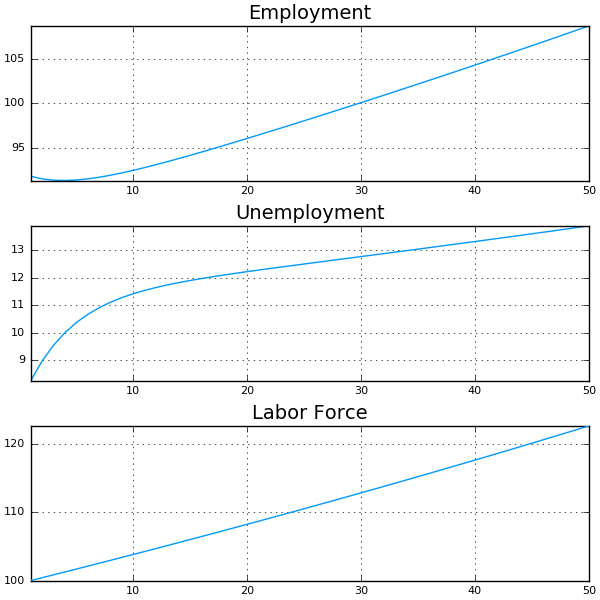

In [6]:
E = X_path[1, :]'
U = X_path[2, :]'
LF = E + U

titles = ["Employment" "Unemployment" "Labor Force"]
plot(1:T, [E U LF], title=titles, layout=(3, 1), legend=:none, size=(600, 600))

How the rates evolve:


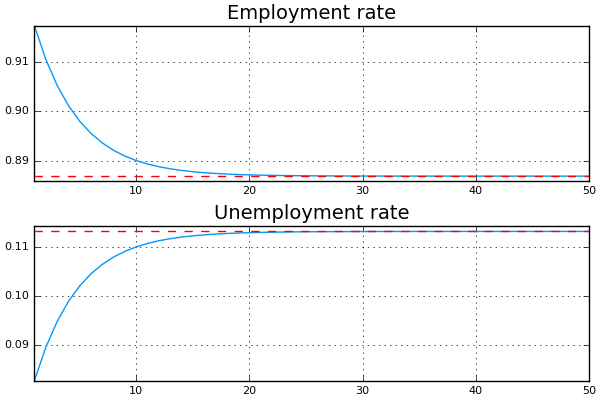

In [7]:
titles = ["Employment rate" "Unemployment rate"]
plot(1:T, x_path', layout=(2, 1), title=titles, legend=:none)
hline!(xbar', layout=(2, 1), color=:red, linestyle=:dash,
       ylims=[(0.999*minimum(x_path[1,:]), Inf)
       (-Inf, 1.01*maximum(x_path[2,:]))]')

We can see that it takes about 20 periods for the economy to converge to its new steady state.

## Exercise 2

This next exercise has the economy expriencing a boom in entrances to the labor market and then later returning to the original levels. For 20 periods the economy has a new entry rate into the labor market.

Let's start off at the baseline parameterization and record the steady state:

In [8]:
lm = LakeModel()
x0 = rate_steady_state(lm)

2-element Array{Float64,1}:
 0.917332 
 0.0826681

Here are the other parameters:

In [9]:
b_hat = 0.003
T_hat = 20

20

Let's simulate with the new value for $b$ for 20 periods.

In [10]:
lm_new = LakeModel(;b=b_hat)
X_path1 = simulate_stock_path(lm_new, x0 * N0, T_hat)
x_path1 = simulate_rate_path(lm_new, x0, T_hat)

2x20 Array{Float64,2}:
 0.917332   0.926001   0.932085  …  0.946339   0.94636    0.946375 
 0.0826681  0.0739993  0.067915     0.0536612  0.0536401  0.0536253

Now with $b$ at the original value, use the state after 20 periods for the new initial conditions, and simulate for an additional 30 periods.

In [11]:
X_path2 = simulate_stock_path(lm, X_path1[:, T_hat], T - T_hat + 1)
x_path2 = simulate_rate_path(lm, x_path1[:, T_hat], T - T_hat + 1)

2x31 Array{Float64,2}:
 0.946375   0.937526   0.931374   …  0.917335   0.917335   0.917334 
 0.0536253  0.0624739  0.0686264     0.0826652  0.0826655  0.0826657

Finally, we combine these two paths and plot.


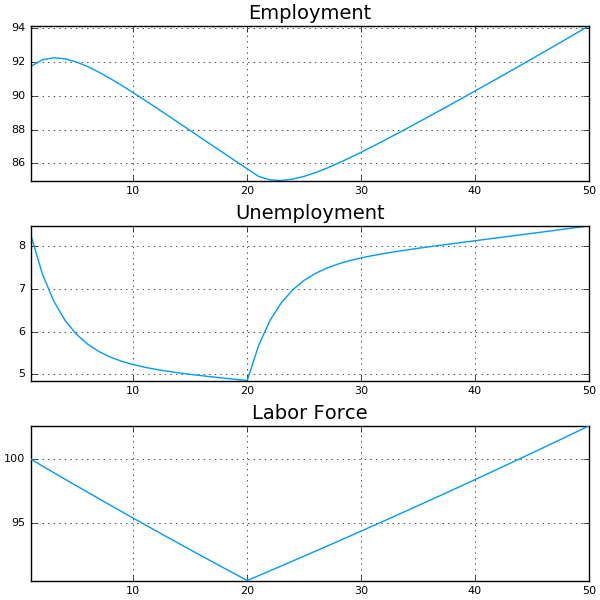

In [12]:
X_path = [X_path1'; X_path2[:,2:end]']
x_path = [x_path1'; x_path2[:,2:end]']

titles = ["Employment" "Unemployment" "Labor Force"]
plot(1:T, [X_path sum(X_path, 2)], title=titles, layout=(3, 1), legend=:none, size=(600, 600))

And the rates:


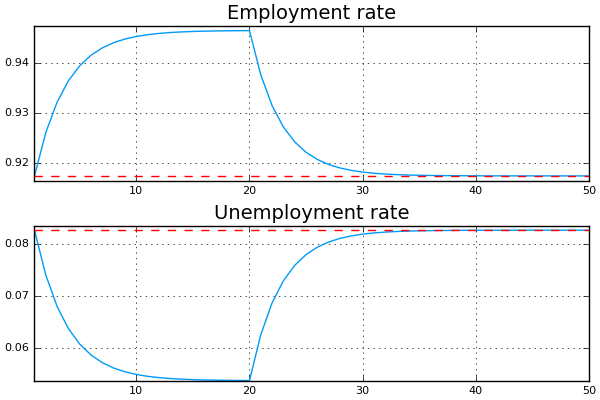

In [13]:
titles = ["Employment rate" "Unemployment rate"]
plot(1:T, x_path, layout=(2, 1), title=titles, legend=:none)
hline!(x0', layout=(2, 1), color=:red, linestyle=:dash,
       ylims=[(0.999*minimum(x_path[:,1]), 1.001*maximum(x_path[:,1]))
       (-Inf, 1.01*maximum(x_path[:,2]))]')
